In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append("../")

from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.reading_tools import make_tuple
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)

In [19]:
params = [
    {
        "graph_type": "barabasi",
        "network_size": 500,
        "memory_size": 256,
        "code_length": 5,
        "kappa": 15.0,
        "lambd": 0.0,
        "alpha": 0.0,
        "omega": 0.0,
        "gamma": 0.0,
        "preferential_attachment": 2,
        "polarization_type": 0
    },
    {
        "graph_type": "barabasi",
        "network_size": 500,
        "memory_size": 256,
        "code_length": 5,
        "kappa": 0.0,
        "lambd": 0.0,
        "alpha": 0.0,
        "omega": 0.0,
        "gamma": 0.0,
        "preferential_attachment": 2,
        "polarization_type": 0
    }
]

In [20]:
results = get_experiment_mean_data(
    params,
    "../results/single_model_test_from_list/"
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


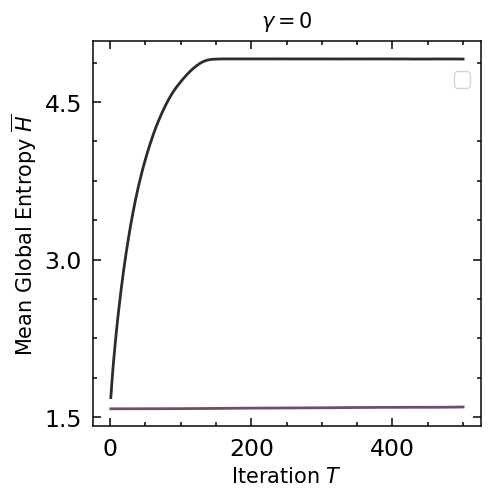

In [21]:
# parameters 

nrows = 1
ncols = 1

titles = [rf"$\gamma = {k}$" for k in [0]]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Mean Global Entropy $\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
        
# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)
    
# plot
line_width = 2

measure = 'entropy'

kappa_color = {
    0.0: "#2e2b28",
    15.0: "#6b506b",
    30.0: "#b04238"
}

X = np.arange(1, 500 + 1)
    
axs[0].plot(X, results[make_tuple(params[0])][measure], c = kappa_color[params[0]['kappa']], linewidth = line_width)
axs[0].plot(X, results[make_tuple(params[1])][measure], c = kappa_color[params[1]['kappa']], linewidth = line_width)
    
axs[0].legend(loc = 'upper right', fontsize = 15, bbox_to_anchor = (1, 0.95))

In [ ]:
from 